In [22]:
## Wavelet Decomposition

[*********************100%%**********************]  1 of 1 completed


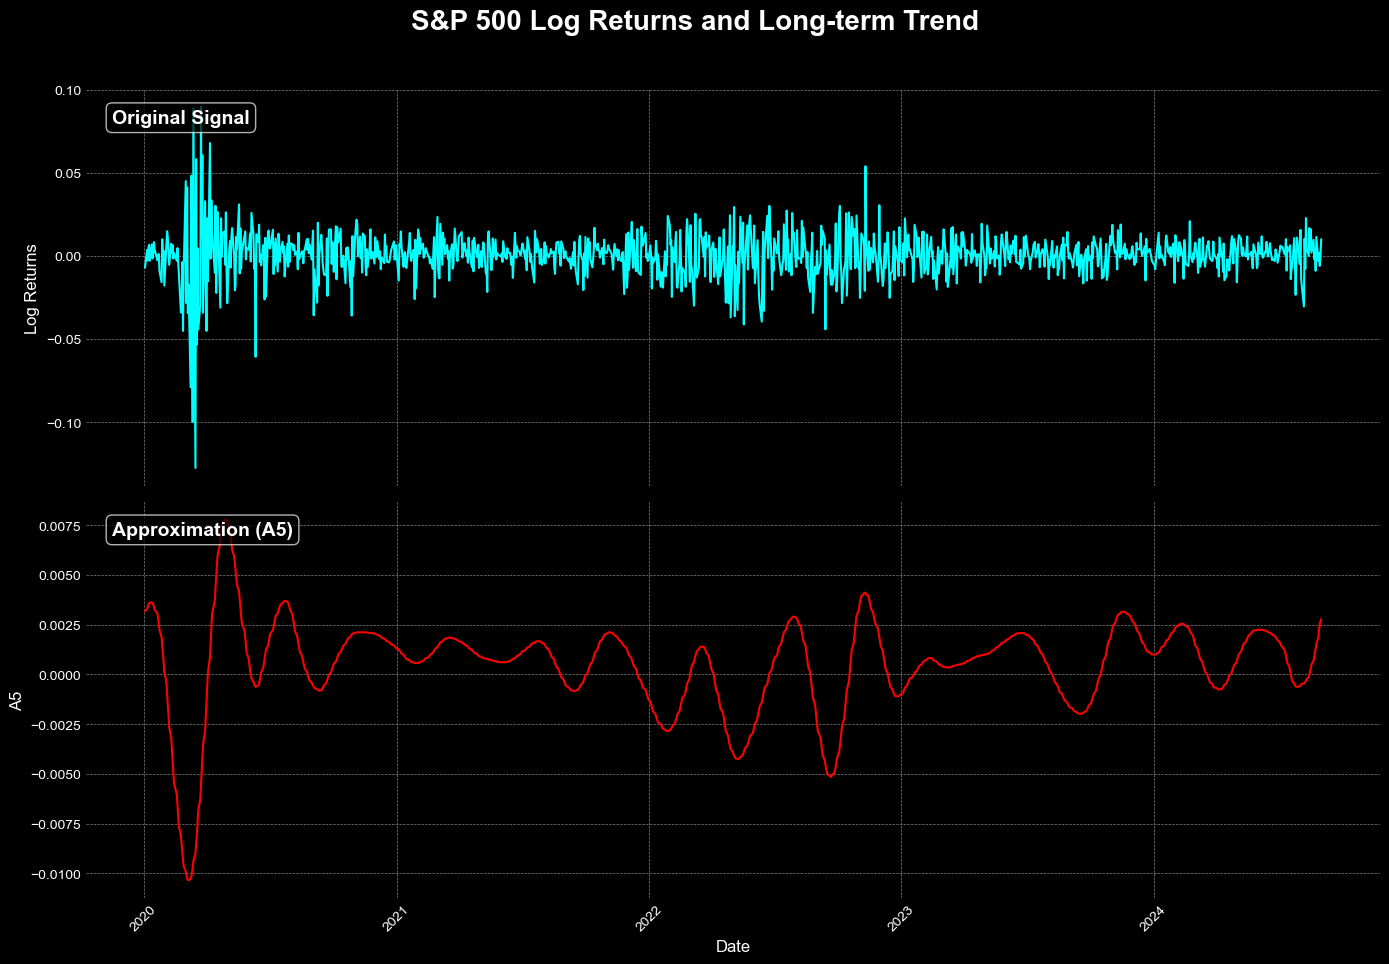

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import pywt
import matplotlib.pyplot as plt
import os



sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-08-31')


returns = np.log(sp500['Close']).diff().dropna()


wavelet = 'db8' 
level = 5
coeffs = pywt.wavedec(returns, wavelet, mode='per', level=level)


plt.style.use('dark_background')


def add_textbox(ax, text, fontsize, fontweight='normal'):
    ax.text(0.02, 0.95, text, transform=ax.transAxes, fontsize=fontsize, fontweight=fontweight,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='black', edgecolor='white', alpha=0.7))


fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig1.suptitle('S&P 500 Log Returns and Long-term Trend', fontsize=20, fontweight='bold', y=0.98)


ax1.plot(returns.index, returns, color='cyan', lw=1.5)
add_textbox(ax1, 'Original Signal', 14, 'bold')
ax1.set_ylabel('Log Returns', fontsize=12)

# A5
reconstructed_approx = pywt.waverec([coeffs[0]] + [np.zeros_like(c) for c in coeffs[1:]], wavelet, mode='per')
ax2.plot(returns.index, reconstructed_approx[:len(returns)], color='red', lw=1.5)
add_textbox(ax2, 'Approximation (A5)', 14, 'bold')
ax2.set_ylabel('A5', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)

for ax in (ax1, ax2):
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0.02, 1, 0.96])
returns_trend_path = os.path.join(current_dir, 'sp500_returns_and_trend.png')
plt.savefig(returns_trend_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()





## Details

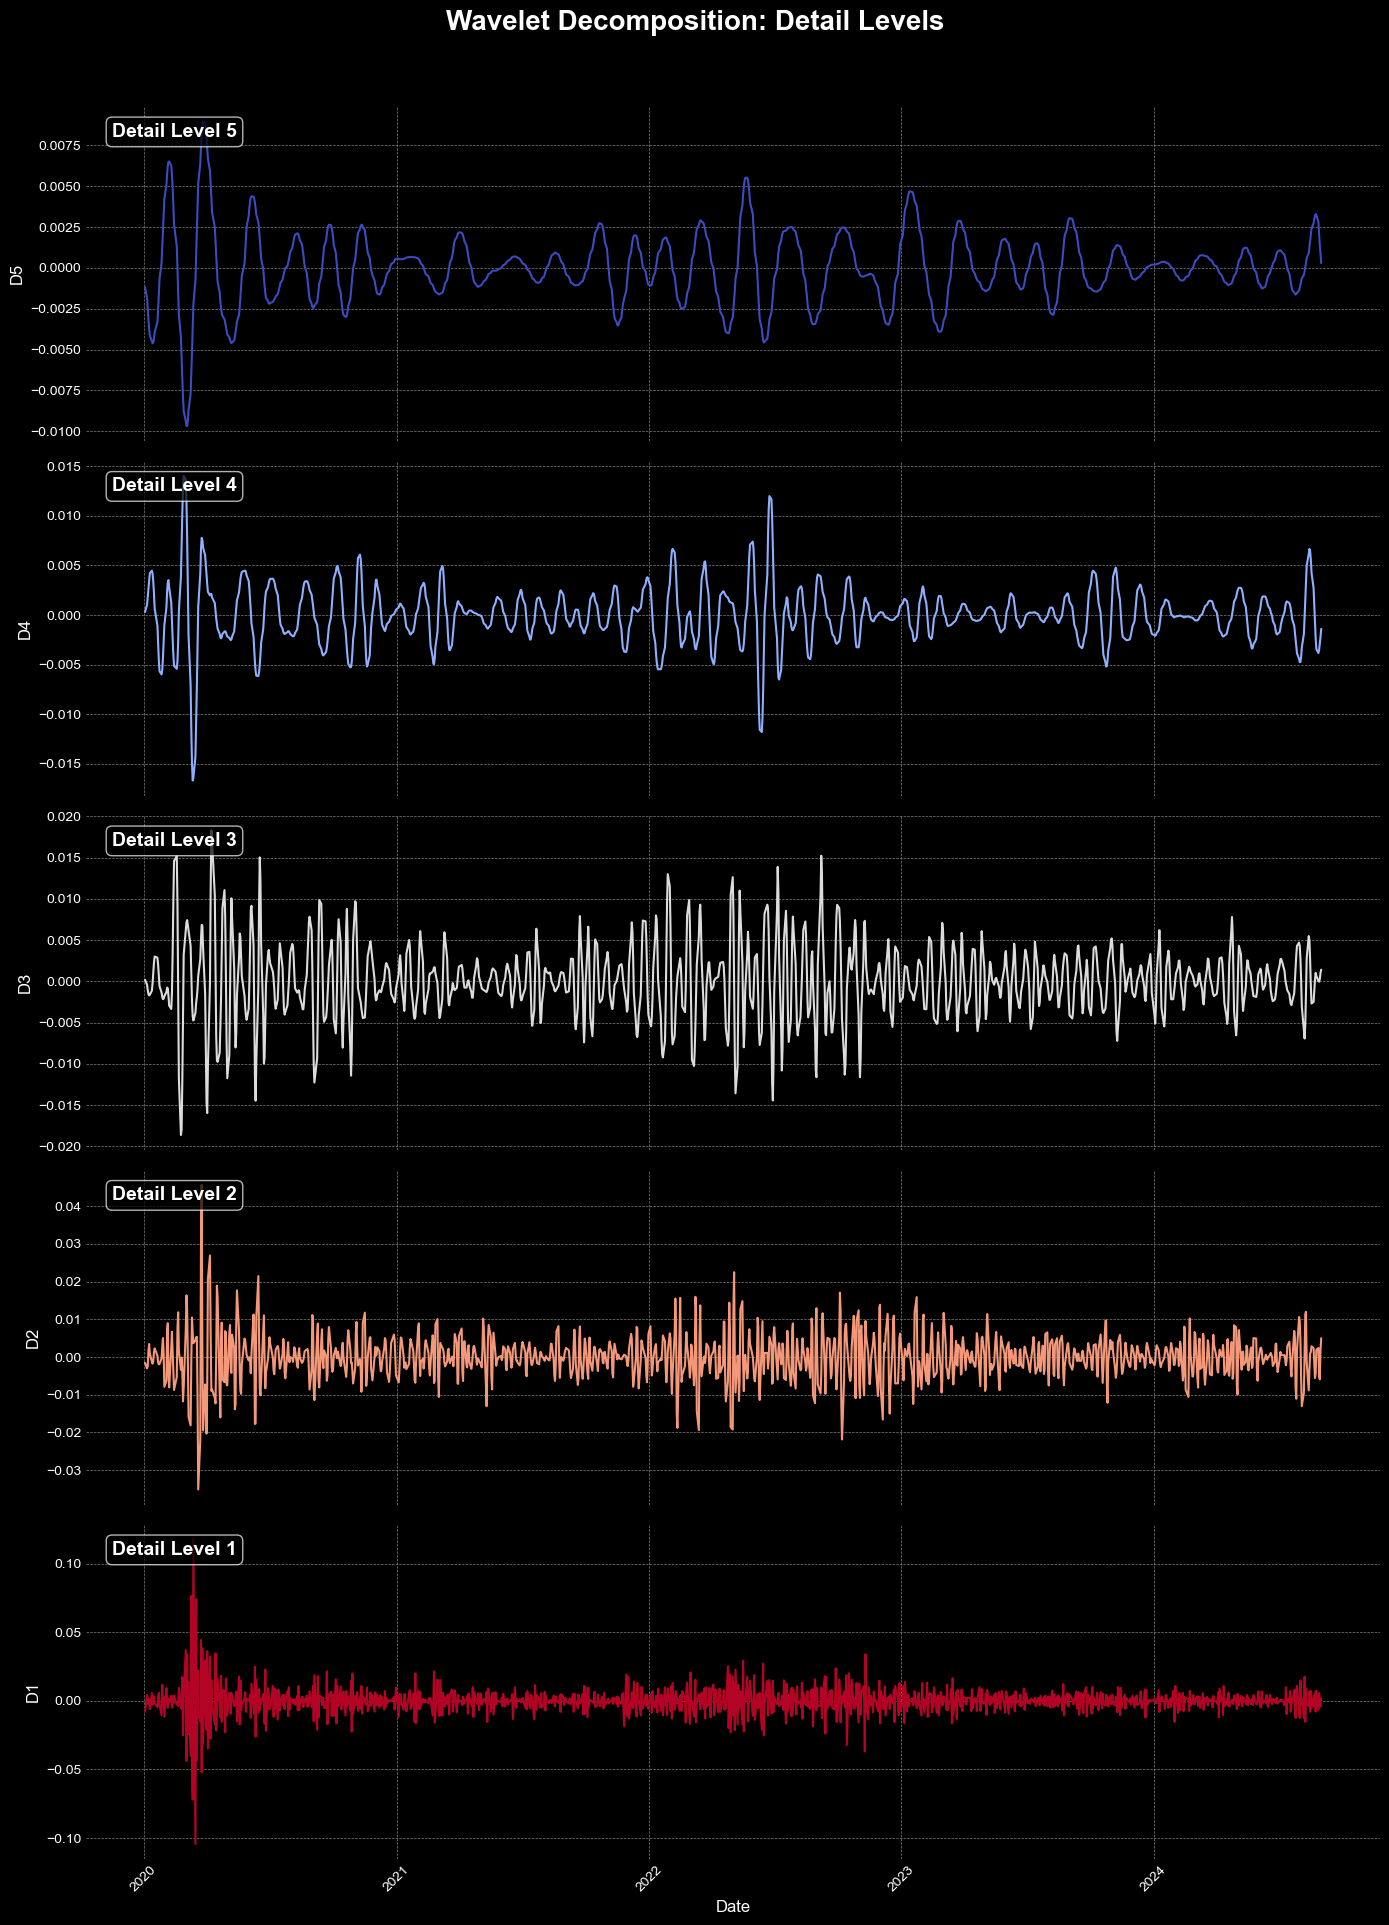

In [24]:
# Di
fig2, axs = plt.subplots(level, 1, figsize=(14, 4*level), sharex=True)
fig2.suptitle('Wavelet Decomposition: Detail Levels', fontsize=20, fontweight='bold', y=0.98)

colors = plt.cm.coolwarm(np.linspace(0, 1, level))


for i in range(level):
    detail_coeffs = [np.zeros_like(c) if j != i+1 else coeffs[j] for j, c in enumerate(coeffs)]
    reconstructed_detail = pywt.waverec(detail_coeffs, wavelet, mode='per')
    axs[i].plot(returns.index, reconstructed_detail[:len(returns)], color=colors[i], lw=1.5)
    add_textbox(axs[i], f'Detail Level {level-i}', 14, 'bold')
    axs[i].set_ylabel(f'D{level-i}', fontsize=12)

axs[-1].set_xlabel('Date', fontsize=12)

for ax in axs:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0.02, 1, 0.96])
wavelet_details_path = os.path.join(current_dir, 'sp500_wavelet_details.png')
plt.savefig(wavelet_details_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()